In [1]:
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.model_selection import train_test_split

In [2]:
np.random.seed(0)
mu1_fact = (0, 0, 0)
cov1_fact = np.diag((1, 2, 3))
data1 = np.random.multivariate_normal(mu1_fact, cov1_fact, 400)
mu2_fact = (2, 2, 1)
cov2_fact = np.array(((1, 1, 3), (1, 2, 1), (0, 0, 1)))
data2 = np.random.multivariate_normal(mu2_fact, cov2_fact, 100)
data = np.vstack((data1, data2))
y = np.array([True] * 400 + [False] * 100)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  import sys


In [3]:
g = GaussianMixture(n_components=2, covariance_type='full', tol=1e-6, max_iter=1000)
g.fit(data)
print ('类别概率:\t', g.weights_[0])
print ('均值:\n', g.means_)
print ('方差:\n', g.covariances_)
mu1, mu2 = g.means_
sigma1, sigma2 = g.covariances_

类别概率:	 0.7637644172419326
均值:
 [[-0.12545026 -0.02183228 -0.06013886]
 [ 1.90145979  1.78791612  1.11152488]]
方差:
 [[[ 0.82510396 -0.10305039 -0.04196107]
  [-0.10305039  2.15967326 -0.16419171]
  [-0.04196107 -0.16419171  2.79315808]]

 [[ 0.70231279  0.91058406  0.739577  ]
  [ 0.91058406  1.8945702   0.77350206]
  [ 0.739577    0.77350206  2.95297451]]]


In [4]:
num_iter = 100
n, d = data.shape
# 随机指定
# mu1 = np.random.standard_normal(d)
# print mu1
# mu2 = np.random.standard_normal(d)
# print mu2
mu1 = data.min(axis=0)
mu2 = data.max(axis=0)
sigma1 = np.identity(d)
sigma2 = np.identity(d)
pi = 0.5
# EM
for i in range(num_iter):
    # E Step
    norm1 = multivariate_normal(mu1, sigma1)
    norm2 = multivariate_normal(mu2, sigma2)
    tau1 = pi * norm1.pdf(data)
    tau2 = (1 - pi) * norm2.pdf(data)
    gamma = tau1 / (tau1 + tau2)

    # M Step
    mu1 = np.dot(gamma, data) / np.sum(gamma)
    mu2 = np.dot((1 - gamma), data) / np.sum((1 - gamma))
    sigma1 = np.dot(gamma * (data - mu1).T, data - mu1) / np.sum(gamma)
    sigma2 = np.dot((1 - gamma) * (data - mu2).T, data - mu2) / np.sum(1 - gamma)
    pi = np.sum(gamma) / n
    #print (i, ":\t", mu1, mu2)
print ('类别概率:\t', pi)
print ('均值:\t', mu1, mu2)
print ('方差:\n', sigma1, '\n\n', sigma2, '\n')

类别概率:	 0.7650337783291882
均值:	 [-0.123994   -0.02138048 -0.06003756] [1.9076683  1.79622192 1.11752474]
方差:
 [[ 0.82563399 -0.10180706 -0.0414597 ]
 [-0.10180706  2.15816316 -0.16360603]
 [-0.0414597  -0.16360603  2.79283956]] 

 [[0.69690051 0.90370392 0.73552321]
 [0.90370392 1.8856117  0.76747618]
 [0.73552321 0.76747618 2.94819132]] 



In [5]:
# 预测分类
norm1 = multivariate_normal(mu1, sigma1)
norm2 = multivariate_normal(mu2, sigma2)
tau1 = norm1.pdf(data)
tau2 = norm2.pdf(data)

[0 1]
准确率：89.80%


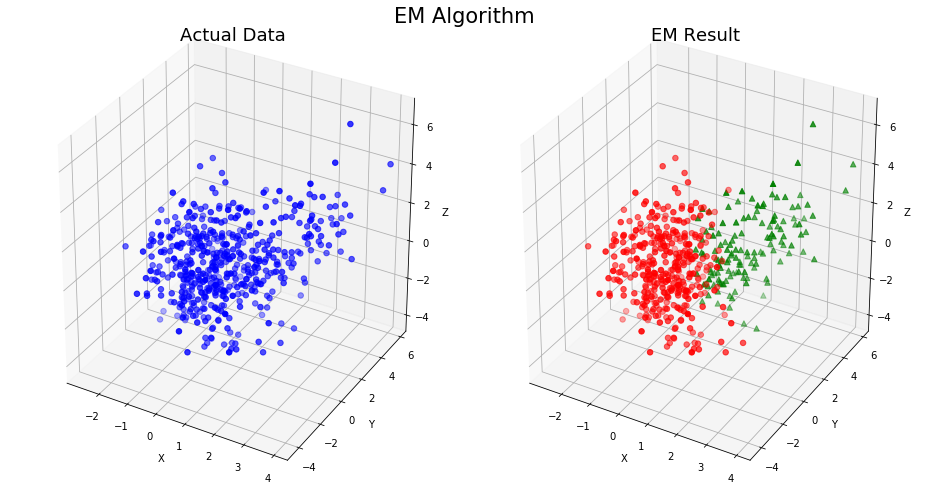

In [6]:
fig = plt.figure(figsize=(13, 7), facecolor='w')
ax = fig.add_subplot(121, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='b', s=30, marker='o', depthshade=True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Actual Data', fontsize=18)
ax = fig.add_subplot(122, projection='3d')
order = pairwise_distances_argmin([mu1_fact, mu2_fact], [mu1, mu2], metric='euclidean')
print (order)
if order[0] == 0:
    c1 = tau1 > tau2
else:
    c1 = tau1 < tau2
c2 = ~c1
acc = np.mean(y == c1)
print (u'准确率：%.2f%%' % (100*acc))
ax.scatter(data[c1, 0], data[c1, 1], data[c1, 2], c='r', s=30, marker='o', depthshade=True)
ax.scatter(data[c2, 0], data[c2, 1], data[c2, 2], c='g', s=30, marker='^', depthshade=True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(u'EM Result', fontsize=18)
plt.suptitle(u'EM Algorithm', fontsize=21)
plt.subplots_adjust(top=0.90)
plt.tight_layout()
plt.show()

In [7]:
data = np.loadtxt('HeightWeight.csv', dtype=np.float, delimiter=',', skiprows=1)
print (data.shape)

(114, 3)


In [8]:
y, x = np.split(data, [1, ], axis=1)
x, x_test, y, y_test = train_test_split(x, y, train_size=0.6, random_state=0)
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
x_min = np.min(x, axis=0)
x_max = np.max(x, axis=0)
gmm.fit(x)
print ('均值 = \n', gmm.means_)
print ('方差 = \n', gmm.covariances_)

均值 = 
 [[160.13983374  55.93370575]
 [173.50243688  65.03359308]]
方差 = 
 [[[ 18.82128194  12.30370549]
  [ 12.30370549  31.23596113]]

 [[ 23.22794989  28.48688647]
  [ 28.48688647 105.81824734]]]


In [17]:
y_hat = gmm.predict(x)
y_test_hat = gmm.predict(x_test)
change = (gmm.means_[0][0] > gmm.means_[1][0])
if change:
    z = y_hat == 0
    y_hat[z] = 1
    y_hat[~z] = 0
    z = y_test_hat == 0
    y_test_hat[z] = 1
    y_test_hat[~z] = 0
acc = np.mean(y_hat.ravel() == y.ravel())
acc_test = np.mean(y_test_hat.ravel() == y_test.ravel())
acc_str = u'训练集准确率：%.2f%%' % (acc * 100)
acc_test_str = u'测试集准确率：%.2f%%' % (acc_test * 100)
print (acc_str)
print (acc_test_str)


def accuracy_rate(y1, y2):
    acc = np.mean(y1 == y2)
    return acc if acc > 0.5 else 1-acc

err = 1 - accuracy_rate(gmm.predict(x_test), y_test)
bic = gmm.bic(x_test)
print ('错误率：', err.ravel())
print ('BIC：', bic.ravel())

训练集准确率：77.94%
测试集准确率：82.61%
错误率： [0.22058824]
BIC： [674.29547578]


[[9.99997750e-01 2.25031842e-06]
 [9.99997839e-01 2.16136597e-06]
 [9.99997923e-01 2.07669097e-06]
 ...
 [6.34944402e-11 1.00000000e+00]
 [5.78303161e-11 1.00000000e+00]
 [5.26521608e-11 1.00000000e+00]]


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 35757 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 32451 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 38598 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20934 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 30830 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 29575 missing from c

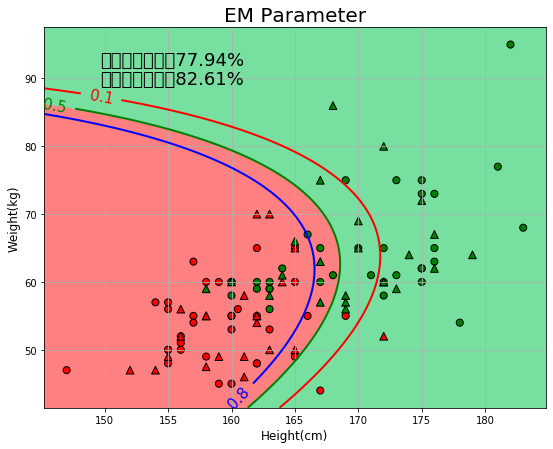

In [10]:
def expand(a, b):
    d = (b - a) * 0.05
    return a-d, b+d


cm_light = mpl.colors.ListedColormap(['#FF8080', '#77E0A0'])
cm_dark = mpl.colors.ListedColormap(['r', 'g'])
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()
x1_min, x1_max = expand(x1_min, x1_max)
x2_min, x2_max = expand(x2_min, x2_max)
x1, x2 = np.mgrid[x1_min:x1_max:500j, x2_min:x2_max:500j]
grid_test = np.stack((x1.flat, x2.flat), axis=1)
grid_hat = gmm.predict(grid_test)
grid_hat = grid_hat.reshape(x1.shape)
if change:
    z = grid_hat == 0
    grid_hat[z] = 1
    grid_hat[~z] = 0
    
    
    
err[i] = 1 - accuracy_rate(gmm.predict(x), y)
bic[i] = gmm.bic(x)
print '错误率：', err.ravel()
print 'BIC：', bic.ravel()

plt.figure(figsize=(9, 7), facecolor='w')
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)
plt.scatter(x[:, 0], x[:, 1], s=50, c=y[:,0], marker='o', cmap=cm_dark, edgecolors='k')
plt.scatter(x_test[:, 0], x_test[:, 1], s=60, c=y_test[:,0], marker='^', cmap=cm_dark, edgecolors='k')

p = gmm.predict_proba(grid_test)
print (p)
p = p[:, 0].reshape(x1.shape)
CS = plt.contour(x1, x2, p, levels=(0.1, 0.5, 0.8), colors=list('rgb'), linewidths=2)
plt.clabel(CS, fontsize=15, fmt='%.1f', inline=True)
ax1_min, ax1_max, ax2_min, ax2_max = plt.axis()
xx = 0.9*ax1_min + 0.1*ax1_max
yy = 0.1*ax2_min + 0.9*ax2_max
plt.text(xx, yy, acc_str, fontsize=18)
yy = 0.15*ax2_min + 0.85*ax2_max
plt.text(xx, yy, acc_test_str, fontsize=18)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.xlabel('Height(cm)', fontsize='large')
plt.ylabel('Weight(kg)', fontsize='large')
plt.title('EM Parameter', fontsize=20)
plt.grid()